# Data Audit and Fixing

In this exercise, we will go through a list of tasks with different examples to audit data and fix data problems.

In [1]:
## importing libaries
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
import re


## Task 1: Initial Auditing

In this task, you are required to use graphical and non-graphical tools to conduct initial auditing of a dataset. 
The example dataset that we use here is the KC Housing Dataset.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It has many characteristics of learning, and the original dataset can be downloaded from [here](https://www.kaggle.com/harlfoxem/housesalesprediction).

In this exercise, we have manually introduced some errors into this dataset. Before you  start, please make sure you have the 'data' folder in the same folder of this exercise. For Task 1, we will use the following data file inside the data folder:
- kc_house.csv

You should refer to [here](https://www.kaggle.com/harlfoxem/housesalesprediction) for the detailed description of each column.  

### Task 1.1 Load Data into a Pandas Dataframe

In [2]:
df = pd.read_csv('data/kc_house.csv')
print(df.shape) # number of rows and columns
df.head()

(9979, 19)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.5,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.5,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.0,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


### Task 1.2 Quick Overview of the Dataset

Let's get a quick overview of the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9979 entries, 0 to 9978
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9979 non-null   int64  
 1   date           9979 non-null   object 
 2   price          9979 non-null   float64
 3   bedrooms       9979 non-null   int64  
 4   bathrooms      9828 non-null   object 
 5   sqft_living    9979 non-null   int64  
 6   sqft_lot       9979 non-null   int64  
 7   floors         9979 non-null   float64
 8   waterfront     9979 non-null   int64  
 9   view           9979 non-null   int64  
 10  condition      9979 non-null   int64  
 11  grade          9979 non-null   int64  
 12  sqft_above     9979 non-null   int64  
 13  sqft_basement  9979 non-null   int64  
 14  yr_built       9979 non-null   int64  
 15  yr_renovated   9979 non-null   int64  
 16  zipcode        9979 non-null   int64  
 17  lat            9979 non-null   float64
 18  long    

In [4]:
df.describe()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.979000e+03,9.979000e+03,9979.000000,9979.000000,9.979000e+03,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000
mean,4.597862e+09,4.976163e+05,3.356749,2025.471089,1.548811e+04,1.487774,0.002405,0.194709,3.373384,7.593947,1751.482413,273.988676,1972.072853,67.961018,98078.445936,47.555247,-122.212535
std,2.879295e+09,2.531411e+05,1.045371,854.999593,4.300988e+04,0.540827,0.048985,0.679473,0.623002,1.112741,794.315316,418.520443,28.848934,361.886020,53.447859,0.142292,0.140854
min,1.000102e+06,8.995000e+04,1.000000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1410.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456700,-122.329000
50%,3.905080e+09,4.399500e+05,3.000000,1870.000000,7.515000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.366600e+09,6.096750e+05,4.000000,2481.500000,1.036550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,48.000000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


Oh, most are numeric columns.

### Task 1.3 Checking Missingness
See whether there are any missingness in columns:

In [5]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        151
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

Oh, we can see that the column `bathrooms` has 151 missing values.

### Task 1.4 Domain Values

Let's check the value domain of all the columns. First, let's start with the column `bedrooms`.

In [6]:
df['bedrooms'].value_counts()

3     4631
4     3110
2     1305
5      722
6      126
1       82
33       1
25       1
48       1
Name: bedrooms, dtype: int64

Majority has 2-4 bedrooms. Some luxury ones have 5-6 and one has 25, one has 33 and one has 48 bedrooms:D ... You can also do this with a simple count plot:

C:\Users\E104857\Anaconda3\envs\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

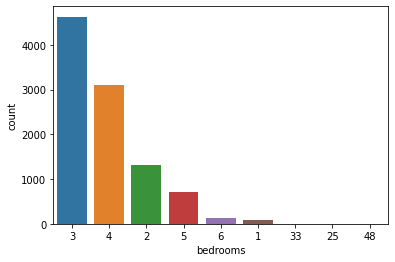

In [7]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

In [8]:
df['bathrooms'].value_counts() # check the value domain of the column bathrooms

2.5     2423
1.0     1789
1.75    1407
2.25     959
2.0      888
1.5      675
2.75     511
3.5      321
3.0      311
3.25     225
-         97
4.0       58
3.75      56
4.5       34
0.75      28
4.25      26
5.0        5
4.75       4
1.25       3
0.5        2
5.25       2
5.75       1
6.5        1
5.5        1
6.0        1
Name: bathrooms, dtype: int64

Oh.... the unit of bathrooms looks interesting, it has an increment of 0.25. There are also 97 records with a value '-'. 

In [9]:
df['grade'].value_counts() # check the value domain of the column grade

7     4336
8     2804
9     1138
6      961
10     457
11     136
5      107
12      25
4       12
13       3
Name: grade, dtype: int64

In [10]:
df['condition'].value_counts() # check the value domain of the column condition

3    6704
4    2528
5     652
2      84
1      11
Name: condition, dtype: int64

In [11]:
df['floors'].value_counts() # check the value domain of the column floors

1.0    5020
2.0    3783
1.5     827
3.0     289
2.5      57
3.5       3
Name: floors, dtype: int64

In [12]:
df['view'].value_counts() # check the value domain of the column view

0    9116
2     438
3     201
1     144
4      80
Name: view, dtype: int64

In [13]:
df['waterfront'].value_counts() # check the value domain of the column waterfront

0    9955
1      24
Name: waterfront, dtype: int64

### Task 1.5 Checking Distributions
Now let's check the distribution of the columns `sqft_living`, `sqft_lot`, `sqft_above` and `sqft_basement`.

array([[<AxesSubplot:title={'center':'sqft_living'}>]], dtype=object)

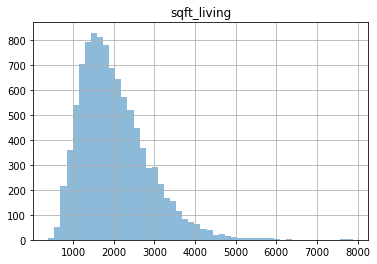

In [14]:
df.hist('sqft_living', bins=50, alpha=0.5)

We can also use a distribution plot to see if the data is skewed or not:

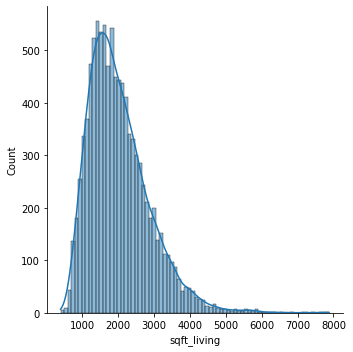

In [15]:
sns.displot(data=df, x="sqft_living",kde=True)

Do the same for the all 4 columns:

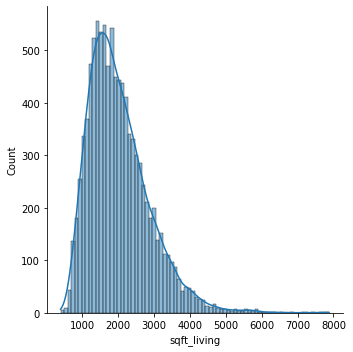

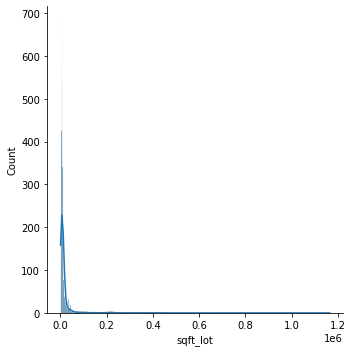

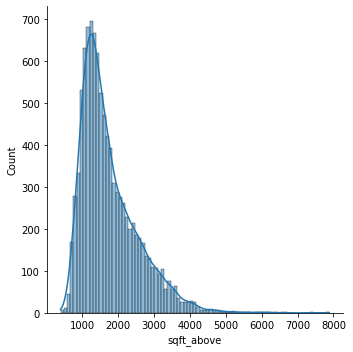

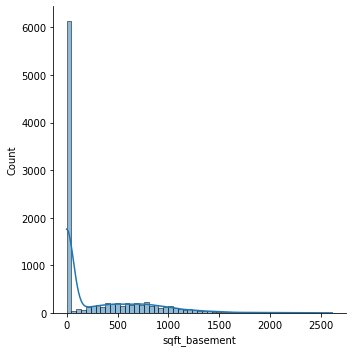

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']


for i in range(0,len(columns)):
    sns.displot(data=df, x=columns[i],kde=True)

### Task 1.6 Checking Correlations
Let's check correlations between variables.
To get an overview:

In [20]:
df.corr()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.011337,0.010115,-0.015018,-0.146693,0.023690,-0.004459,0.017193,-0.022246,0.007102,-0.010606,-0.010551,0.022983,-0.021375,-0.005154,-0.003512,0.014630
price,-0.011337,1.000000,0.291128,0.723203,0.135670,0.297925,0.041119,0.302372,-0.007892,0.714322,0.628201,0.285168,0.130753,0.056897,-0.032738,0.372321,0.070683
bedrooms,0.010115,0.291128,1.000000,0.498827,0.028569,0.138095,-0.012843,0.057685,0.019351,0.293413,0.402142,0.255828,0.138224,0.011231,-0.120632,-0.008183,0.115861
sqft_living,-0.015018,0.723203,0.498827,1.000000,0.194917,0.349573,0.012316,0.235155,-0.081943,0.749966,0.873754,0.384600,0.352810,0.022214,-0.201330,0.035685,0.266521
sqft_lot,-0.146693,0.135670,0.028569,0.194917,1.000000,-0.005178,0.039162,0.093741,-0.010641,0.129769,0.201360,0.016035,0.056616,0.010546,-0.132891,-0.085425,0.251375
floors,0.023690,0.297925,0.138095,0.349573,-0.005178,1.000000,-0.006456,0.012342,-0.272296,0.452717,0.518989,-0.270850,0.516348,-0.002336,-0.061269,0.039097,0.121121
waterfront,-0.004459,0.041119,-0.012843,0.012316,0.039162,-0.006456,1.000000,0.253916,0.013263,0.005048,-0.000689,0.026468,-0.035584,0.080563,0.039324,-0.044933,-0.057813
view,0.017193,0.302372,0.057685,0.235155,0.093741,0.012342,0.253916,1.000000,0.026638,0.200415,0.128006,0.237455,-0.043671,0.057496,0.080462,-0.005046,-0.064486
condition,-0.022246,-0.007892,0.019351,-0.081943,-0.010641,-0.272296,0.013263,0.026638,1.000000,-0.169586,-0.170447,0.156090,-0.343078,-0.057993,-0.013615,-0.048115,-0.085412
grade,0.007102,0.714322,0.293413,0.749966,0.129769,0.452717,0.005048,0.200415,-0.169586,1.000000,0.742616,0.122693,0.486414,-0.020436,-0.187398,0.095562,0.217592


To make it a bit easier/nicer to read, using a heatmap:

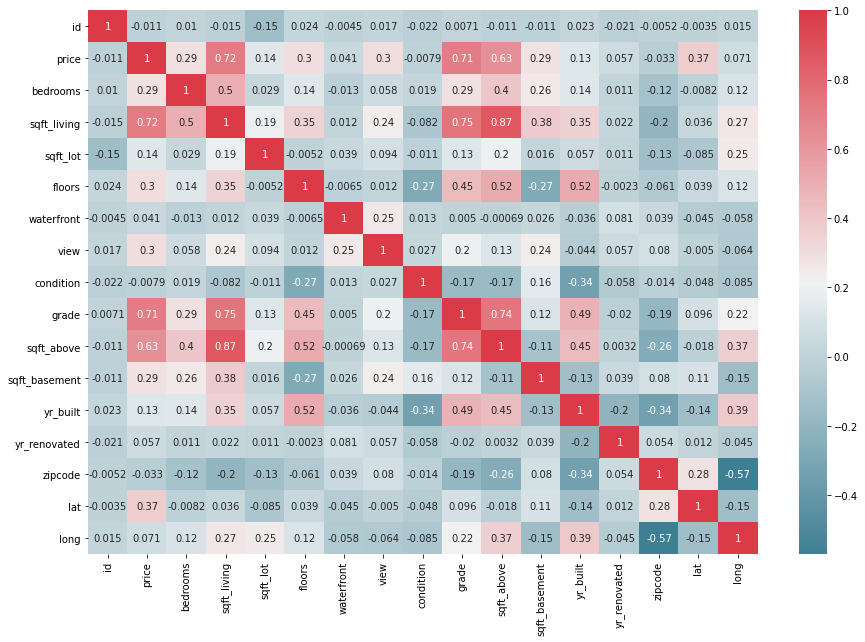

In [21]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

Some of the outstanding variables: `sqft_living` and `sqft_above`, `price` and `grade`, `price` and `sqft_living`, `bedrooms` and `sqft_living`, `grade` and `sqft_living` are strongly correlated.

## Task 2 Data Cleansing

There are a number of subtasks in this task, each relates to a particular type of data quality problem and you are required to audit the problem and fix by coding. 
All the data files required for this task are located inside the 'data' folder. 

### Task 2.1 Misspelling and inconsistency 
This subtask requires the dataset `task2_1.csv`.
It contains one single column `suburb`, i.e., a list of suburb names. 
However, there are misspelling and inconsistency in some of the records. 
You are required to audit the data and fix where required. 

In [22]:
data = pd.read_csv('data/task2_1.csv')
data.head()

,suburb
0,anthony
1,Amelup
2,Antonymyre
3,albion park
4,ashbury


oh, it seems that some values start with capital letters whilst some are just lower case letters. Let's normalise it:

In [23]:
data['suburb']= data['suburb'].str.lower()

In [24]:
data['suburb'].value_counts()

ashby             155
allens rivulet    146
adventure bay     145
allenstown        145
alexandra         144
                 ... 
avonmore           97
anatye             97
ancona             96
ambarvala           2
ashment             2
Name: suburb, Length: 413, dtype: int64

Most suburb names has high frequency, except for two: `ashment` and `ambarvala`. It seems like they are typos. 
Before we fix the typos, if you're not that familiar with the suburb names, we can actually find the best matching suburb names using the `difflib` library.

In [25]:
import difflib

# finding the best match from the rest of all suburb names, with a specific threshold .85
# you can gradually lower the threshod if there is no matching
difflib.get_close_matches('ashment',set(data['suburb']).difference(['ashment']), n = 1,cutoff=0.85) 

['ashmont']

In [26]:
difflib.get_close_matches('ambarvala',set(data['suburb']).difference(['ambarvala']), n = 1,cutoff=0.85) 

['ambarvale']

Ok, it so seems that 'ashment' is a typo of 'ashmont', and 'ambarvala' is a typo of 'ambarvale'. Let's get them fixed. 

In [27]:
replace_dict = {'ashment':'ashmont', 'ambarvala':'ambarvale'}
data['suburb'].replace(replace_dict,inplace=True)
data['suburb'].value_counts()

ashby               155
allens rivulet      146
adventure bay       145
allenstown          145
alma park           144
                   ... 
allambie heights     98
alpha                98
avonmore             97
anatye               97
ancona               96
Name: suburb, Length: 411, dtype: int64

In [28]:
data.to_csv('task2_1_cleaned.csv',index = False)

## Task 2.2 Irregularities
This subtask requires the data set `task2_2.csv`.
It contains one single column `salary`, i.e., a list of annual salary values. 
However, there are irregularities problems. 
You are required to audit the data and fix where required. 

In [29]:
data = pd.read_csv('data/task2_2.csv')
data.head(10)

,salary
0,86000
1,"77,000"
2,86000
3,"63,000"
4,"81,000"
5,91000
6,52k
7,"81,000"
8,54000
9,"97,000"


In [30]:
data.dtypes

salary    object
dtype: object

`salary` is a string type object. There seems to be mainly three different ways that the salary was written:
- digits only
- digits follow with a 'k'
- digits seperate by a comma

Let's see what are the possible non-digit characters in the salary value. 

In [31]:
non_digit_chars = data['salary'].apply(lambda x: re.findall(r'\D+', x))
non_digit_chars.astype('str').value_counts() # as each element in non_digit_chars is a list, 
                                             # we need to convert it to string before we can do value counts

[]       16722
['k']    16650
[',']    16628
Name: salary, dtype: int64

Ok, that further confirms our assumption. 
Let's unify them to just digits:

In [32]:
data['salary'] = data.salary.apply(lambda x: re.sub(',','',x)) # delete ','
data['salary'] = data.salary.apply(lambda x: re.sub('k','000',x)) # replace k by 000


In [33]:
# see whether type cast to int is successful
data['salary'].astype(int)

0        86000
1        77000
2        86000
3        63000
4        81000
         ...  
49995    67000
49996    62000
49997    76000
49998    97000
49999    84000
Name: salary, Length: 50000, dtype: int32

In [34]:
data.to_csv('task2_2_cleaned.csv',index = False)

### Task 2.3 Integrity Constraint Violation
This subtask requires the data set `task2_3.csv`.
It contains pairs of datetime information about buildings’ built year and settlement date. 
However, there are integrity constraint violation problems. 
You are required to audit the data and fix where required. 

In [35]:
data = pd.read_csv('data/task2_3.csv')
data.head(10)

,year_built,date_settled
0,2007,06/06/2009
1,2006,07/30/2006
2,2008,07/24/2009
3,2001,02/14/2002
4,2012,04/08/2014
5,2014,06/22/2014
6,2011,01/26/2011
7,2000,03/16/2001
8,2007,05/31/2008
9,2003,07/22/2004


In [36]:
data.dtypes

year_built       int64
date_settled    object
dtype: object

Obviously, `date_settled` should be after `year_built`. 
Let's create an indicator column `violated` to indicate whether the record violated integrity constraints.

In [37]:
data['violated'] = data.apply(lambda row: \
                              int(re.search(r'\d{4}',row['date_settled']).group(0)) < row['year_built'] ,axis =1)
data['violated']

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: violated, Length: 50000, dtype: bool

In [38]:
data[data['violated']]

,year_built,date_settled,violated
2135,2003,11/22/2001,True
37447,2034,01/17/2015,True


There is no clue what that year_built means, let's use the year in the settled date instead:

In [39]:
applied_indices = data[data['violated']].index
for ind in applied_indices:
    year = int(re.search(r'\d{4}',data.loc[ind,'date_settled']).group(0))
    data.loc[ind,'year_built'] = year

In [40]:
# double check whether there are still any violation
data['violated'] = data.apply(lambda row: int(re.search(r'\d{4}',row['date_settled']).group(0)) < row['year_built'] ,axis =1)
data[data['violated']]

,year_built,date_settled,violated


In [41]:
del data['violated'] # delete the column we created for testing

In [42]:
data.to_csv('task2_3_cleaned.csv',index = False)

### Task 2.4 Missing values

In this subtask, we will be using the `kc_house.csv` dataset again. 
As shown in Task 1.3, there are 151 missing values in the `bathrooms` column, there are also 97 records with a value '-'. 
In this task, let's impute the missing values for the `bathrooms` column, including records that contains just a '-'.

In [43]:
# read the data again just in case you've lost it somewhere.....
df = pd.read_csv('data/kc_house.csv')
print(df.shape) # number of rows and columns
df.head()

(9979, 19)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.5,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.5,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.0,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [44]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        151
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

Let's first change values with '-' as missing in the bathroom column:

In [45]:
condition = df['bathrooms'] == '-'
df.loc[condition,'bathrooms'] = None
df['bathrooms'].isnull().sum()

248

Ok, in total there are 248 values to impute. 
Let's convert bathroom to float type and see the correlation with other attributes. 

In [46]:
df['bathrooms'] = df['bathrooms'].astype(float)

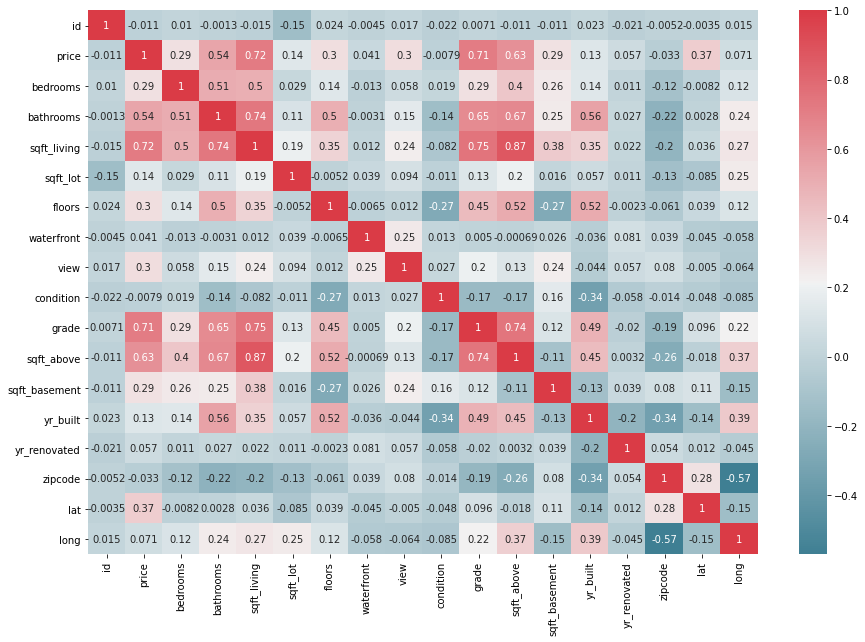

In [47]:
correlation_heatmap(df)

`bathrooms` seems to have strong correlation with a number of attributes: `price`, `bedrooms`,`sqft_living`, `floors`,`grade`,`sqft_above`, and `yr_built`. Let's make use these attributes to impute values of `bathrooms` using linear regression. 

In [48]:
df_missing = df.loc[df.isnull().any(axis=1), df.isnull().any()]
df_missing

,bathrooms
28,NaN
40,NaN
49,NaN
160,NaN
162,NaN
...,...
9902,NaN
9906,NaN
9944,NaN
9975,NaN


In [49]:
# getting the indices that contains missing values 
df_missing.index

Int64Index([  28,   40,   49,  160,  162,  310,  352,  368,  441,  444,
            ...
            9666, 9673, 9728, 9792, 9803, 9902, 9906, 9944, 9975, 9977],
           dtype='int64', length=248)

In [50]:
# create another dataframe without missing values to build the model
df_no_nan = df.dropna(axis=0)
bathrooms_list = df_no_nan.bathrooms.unique().tolist()
bathrooms_list

[2.25,
 3.5,
 1.5,
 1.0,
 2.0,
 2.5,
 2.75,
 1.75,
 4.25,
 3.0,
 4.0,
 3.25,
 3.75,
 0.75,
 1.25,
 4.5,
 5.25,
 0.5,
 5.0,
 4.75,
 5.75,
 6.0,
 6.5,
 5.5]

In [51]:
from sklearn import linear_model
# bulid a linear regression model 
cols = ['price', 'bedrooms','sqft_living', 'floors','grade','sqft_above','yr_built']
x_train = df_no_nan[cols]
y_train = df_no_nan['bathrooms']
regr = linear_model.LinearRegression()

regr.fit(x_train,y_train) # build the model

LinearRegression()

In [52]:
def predict_bath(x):
    x_predict = regr.predict([x]) # expected 2D array as input
    return min(bathrooms_list, key=lambda y:abs(y-x_predict)) # return the nearest bathroom value

# impute the missing records
df.loc[df_missing.index,'bathrooms'] = \
df.loc[df_missing.index].apply(lambda row: predict_bath(row[cols]), axis = 1)

In [53]:
df.loc[df_missing.index,'bathrooms']

28      3.00
40      2.00
49      2.00
160     3.25
162     1.50
        ... 
9902    2.25
9906    2.25
9944    1.00
9975    3.00
9977    2.00
Name: bathrooms, Length: 248, dtype: float64

### Task 2.5 Outliers
In this subtask, we will contine to explore the `kc_house.csv` dataset.
In particular, we will be looking at the `bedrooms` column. 
You are required to use graphical or non-graphical tools to audit this column, and identify whether there exist outliers in the values of this column.

In [54]:
# read the data again just in case you missed it somewhere.....
df = pd.read_csv('data/kc_house.csv')
print(df.shape) # number of rows and columns
df.head()

(9979, 19)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.5,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.5,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.0,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


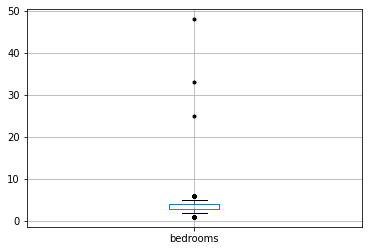

In [55]:
_,bp = df.boxplot(column='bedrooms',sym='k.',return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]] # extract the outlier values

In [56]:
outliers # display the outliers values

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        33,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6, 25, 48,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6], dtype=int64)]

In [57]:
df.bedrooms.value_counts() # check the domain value of the bedrooms column

3     4631
4     3110
2     1305
5      722
6      126
1       82
33       1
25       1
48       1
Name: bedrooms, dtype: int64

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='sqft_living', ylabel='bedrooms'>

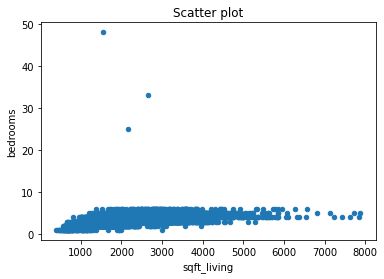

In [58]:
df.plot.scatter(x='sqft_living', y='bedrooms', title= "Scatter plot") # plot a scatter plot to see the correlation between sqft_living and bedrooms

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='price', ylabel='bedrooms'>

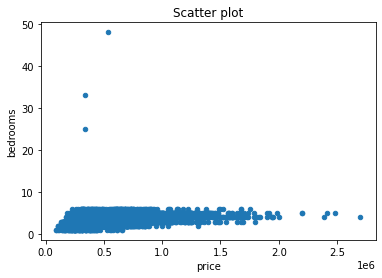

In [59]:
df.plot.scatter(x='price', y='bedrooms', title= "Scatter plot") # plot a scatter plot to see the correlation between price and bedrooms

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='grade', ylabel='bedrooms'>

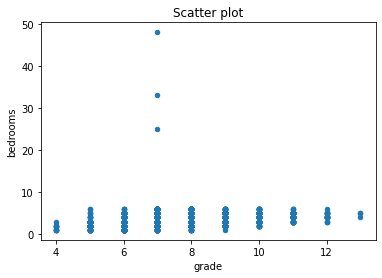

In [60]:
df.plot.scatter(x='grade', y='bedrooms', title= "Scatter plot") # plot a scatter plot to see the correlation between grade and bedrooms

In [61]:
df[df['bedrooms']> 6] # extract all the instances with the number of bedrooms > 6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
4279,7148700050,20150126T000000,340000.0,33,-,2650,7378,1.0,0,0,3,7,1460,1190,1952,0,98155,47.7525,-122.315
5702,9542830540,20150303T000000,339950.0,25,NaN,2150,4000,2.0,0,0,3,7,2150,0,2010,0,98038,47.3655,-122.018
5768,5101402435,20150304T000000,539000.0,48,NaN,1540,5338,1.0,0,0,5,7,770,770,1954,0,98115,47.6942,-122.304


## References

[1] [Regression using sklearn on KC Housing Dataset](https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4)